<a href="https://colab.research.google.com/github/theparthdhumal/Minor-Projects/blob/main/Minor_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression Project**

# **Project Overview**

In this project, I will build a Simple Linear Regression model to model the salary of employees based on their years of experience. It will be used by management to understand how salary varies with experience. They can accordingly manipulate compensation strategies to meet certain salary levels. Further, the model will be a good way for management to understand the salary dynamics for new hires.

# **Linear Regression**

Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.

Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, I employ Simple Linear Regression technique where I have one independent and one dependent variable. It is the simplest form of Linear Regression where we fit a straight line to the data.

# **Problem statement**

To build a simple linear regression model to predict employee salary based on their years of experience using the provided dataset.

# **Importing Python libraries**

• Numpy – It provides a fast numerical array structure and operating functions.

• pandas – It provides tools for data storage, manipulation and analysis tasks.

• Scikit-Learn – The required machine learning library in Python.

• Matplotlib – It is the basic plotting library in Python. It provides tools for making plots

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
 %matplotlib inline

# **Importing the dataset**

Now, we wil be loading the Data set Excel file using the Pandas, by the following process:

In [45]:
df = pd.read_csv('Salary_dataset.csv', sep='\t', header=None)
df = pd.read_csv('Salary_dataset.csv')

# **EDA (Exploratory data analysis)**

The major things we will be doing to perform EDA are:

1. **Removing Duplicates**
2. **Missing value treatment**
3. **Outlier Treatment**
4. **Normalization and Scaling(Numerical Variables)**
5. **Encoding Categorial variables(Dummy variables)**
6. **Univerate Analysis**
7. **Bivariate Analysis**

## **Basic Data Exploration**

In this, we are going to perform the below operations to check what the data set comprises of. We are going to check the below things:

1. **Head of the dataset**
2. **Shape of the dataset**
3. **Info of the dataset**
4. **Summary of the dataset**

In [46]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


**There is a note here that the head function takes the top records of the data set. Also, by default we know that python only displays top 5 records.**

In [47]:
df.shape

(30, 3)

**Shape attribute tells us the number of obeservations and variables. It is used to check the dimension of data. This data set has 301 observations and 9 variables in the data set.**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


**Info is used to check the information about the data and the datatypes of each respective attributes.**

In [49]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


**The describe method will be used to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.**

## **Check for duplicate records**

In [50]:
dups = df.duplicated()
print("Number of duplicate rows = %d" % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Unnamed: 0,YearsExperience,Salary


**Since, we have 0 duplicate records in the data set, we won't be required to remove this from the data set as, we will only have distinct records still we will cross-check it once.**

In [51]:
dups = df.duplicated()
print("Number of duplicate rows = %d" % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Unnamed: 0,YearsExperience,Salary


**The observations and variables will remain the same. We had done this by using the shape attribute again**

In [52]:
df.shape

(30, 3)

## **Outlier Treatment**

**To check for outliners, we will be plotting the box plots**

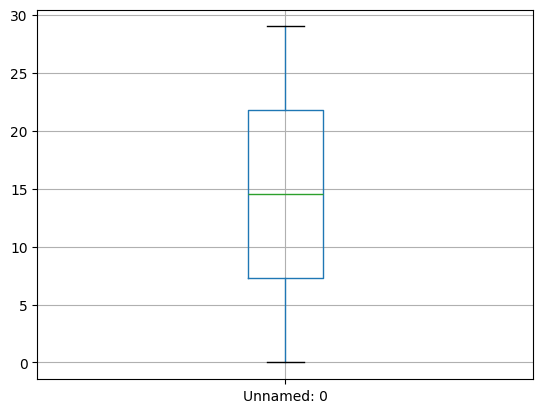

In [66]:
df.boxplot(column=['Unnamed: 0'])
plt.show()

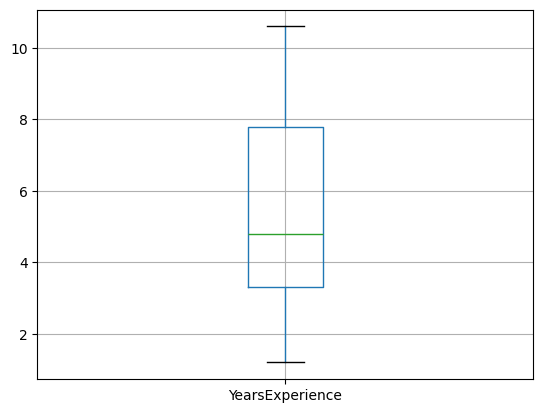

In [63]:
df.boxplot(column=['YearsExperience'])
plt.show()

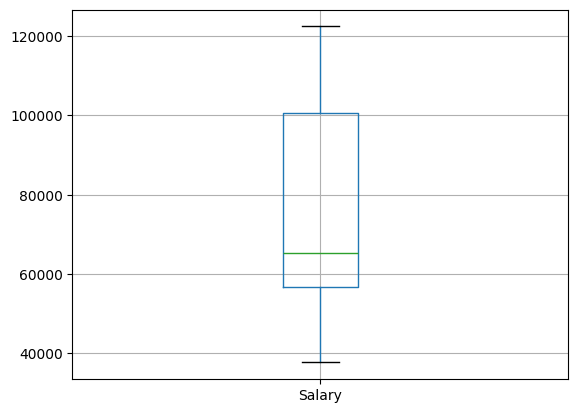

In [62]:
df.boxplot(column=['Salary'])
plt.show()

**As, we can observe that there are no outliers present in variables "YearsExperience" and "Salary". If there any outliers present we can use the below process to treat those ouliers and remove it:**

1. **Drop the outlier value**
2. **Replace the outlier value using the IQR**

**Note: Below is just a sample source code if we have any outliers we can treat it by the below code and putting the designated variables**

In [ ]:
"""
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range
"""

In [ ]:
"""
lrincome, urincome = remove_outlier(df['Selling_Price'])
df['Selling_Price'] = np.where(df['Selling_Price'] > urincome, urincome, df['Selling_Price'])
df['Selling_Price'] = np.where(df['Selling_Price'] < lrincome, lrincome, df['Selling_Price'])

lrtravel, urtravel = remove_outlier(df['Present_Price'])
df['Present_Price'] = np.where(df['Present_Price'] > urtravel, urtravel, df['Present_Price'])
df['Present_Price'] = np.where(df['Present_Price'] < lrtravel, lrtravel, df['Present_Price'])

lrmiles, urmiles = remove_outlier(df['Kms_Driven'])
df['Kms_Driven'] = np.where(df['Kms_Driven'] > urmiles, urmiles, df['Kms_Driven'])
df['Kms_Driven'] = np.where(df['Kms_Driven'] < lrmiles, lrmiles, df['Kms_Driven'])

lrmiles, urmiles = remove_outlier(df['Year'])
df['Year'] = np.where(df['Year'] > urmiles, urmiles, df['Year'])
df['Year'] = np.where(df['Year'] < lrmiles, lrmiles, df['Year'])

irtravel, urtravel = remove_outlier(df['Owner'])
df['Owner'] = np.where(df['Owner'] > urtravel, urtravel, df['Owner'])
df['Owner'] = np.where(df['Owner'] < irtravel, irtravel, df['Owner'])

df.shape
"""

## **Check for missing values**

In [64]:
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


Here we can see, that fortunately it does not have any missing values but for us to know how we should treat the missing values if there are any we can follow the following process:


1. Drop the missing values: In this case we drop the missing values from those variables. In case there are very few missing values you can drop those values.

2. Impute with mean value: For numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn't have extreme values.i.e. outliers.

3. Impute with median value: For numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use median approach.

4. Impute with mode value: For categorical column, you can replace the missing values with mode values i.e the frequent ones

5. we will replace the numerical columns with median values and for categorical columns we will replace the missing values with mode values.

**Note: Below is just a sample source code if we have any missing values we can treat it by the below code and putting the designated variables**




In [ ]:
#df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

In [ ]:
#Replacing Null values in numerical columns using median
"""
median1 = df["Selling_Price"].median()
median2 = df["Present_Price"].median()
median3 = df["Kms_Driven"].median()
median4 = df["Year"].median()
median5 = df["Owner"].median()

df["Selling_Price"].replace(np.nan, median1, inplace=True)
df["Present_Price"].replace(np.nan, median2, inplace=True)
df["Kms_Driven"].replace(np.nan, median3, inplace=True)
df["Year"].replace(np.nan, median4, inplace=True)
df["Owner"].replace(np.nan, median5, inplace=True)
"""

In [ ]:
#Replacing Null values in categorial columns using mode
"""
mode1 = df["Fuel_Type"].mode()[0]
mode2 = df["Seller_Type"].mode()[0]
mode3 = df["Transmission"].mode()[0]
mode4 = df["Car_Name"].mode()[0]

df["Fuel_Type"]=df.replace(np.nan, mode1, inplace=True)
df["Seller_Type"]=df.replace(np.nan, mode2, inplace=True)
df["Transmission"]=df.replace(np.nan, mode3, inplace=True)
df["Car_Name"]=df.replace(np.nan, mode4, inplace=True)
"""


## **Normalization and Scaling(Numerical Variables)**

**Following is the process for Normalization and scaling**

### **Identifying Numerical Variables**

In [65]:
numerical_cols = df.select_dtypes(include=np.number).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')


### **Standardization (StandardScaler)**

In [67]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
df_scaled_standard = df.copy() # Create a copy to avoid modifying the original DataFrame
df_scaled_standard[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])

print("DataFrame after Standardization:")
display(df_scaled_standard.head())

DataFrame after Standardization:


,Unnamed: 0,YearsExperience,Salary
0,-1.675247,-1.510053,-1.360113
1,-1.559712,-1.438373,-1.105527
2,-1.444178,-1.366693,-1.419919
3,-1.328644,-1.187494,-1.204957
4,-1.213110,-1.115814,-1.339781


### **Normalization (MinMaxScaler)**

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
df_scaled_minmax = df.copy() # Create a copy to avoid modifying the original DataFrame
df_scaled_minmax[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

print("DataFrame after Normalization:")
display(df_scaled_minmax.head())

DataFrame after Normalization:


,Unnamed: 0,YearsExperience,Salary
0,0.000000,0.000000,0.019041
1,0.034483,0.021277,0.100094
2,0.068966,0.042553,0.000000
3,0.103448,0.095745,0.068438
4,0.137931,0.117021,0.025514


Now you have two new DataFrames, df_scaled_standard and df_scaled_minmax, with the numerical columns scaled using Standardization and Normalization respectively.

## **Univerate Analysis**

**Following are the Univerate Analysis for the columns used same as the treatment for outliers:**

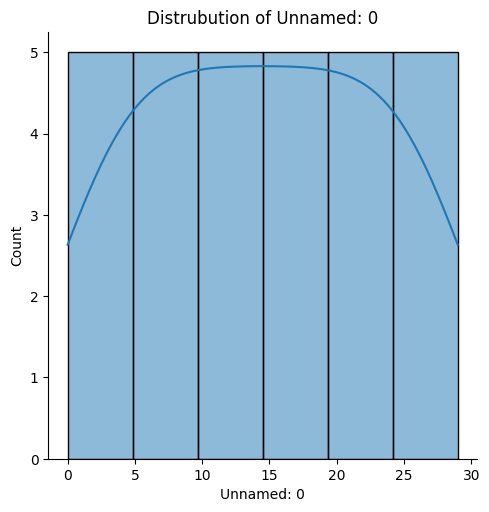

In [71]:
import seaborn as sns
sns.displot(df['Unnamed: 0'], kde = True)
plt.title('Distrubution of Unnamed: 0')
plt.show()

**For above figure, we can say that the Unnamed: 0 parameter resembles a uniform distribution.**

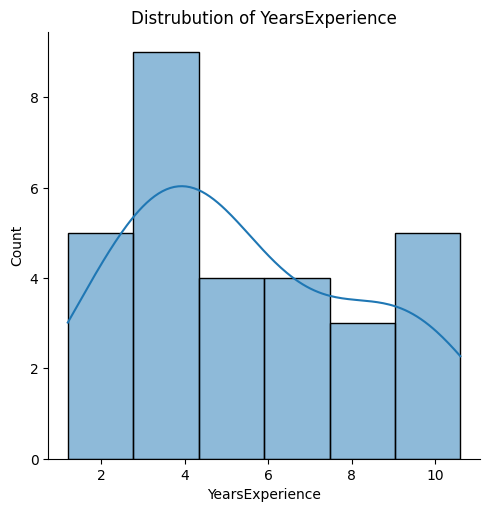

In [72]:
sns.displot(df['YearsExperience'], kde = True)
plt.title('Distrubution of YearsExperience')
plt.show()

**For above figure, we can say that the YearsExperience parameter resembles a uniform distribution.**

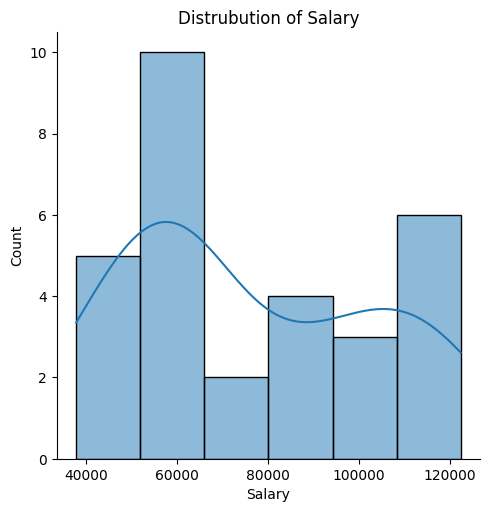

In [73]:
sns.displot(df['Salary'], kde = True)
plt.title('Distrubution of Salary')
plt.show()

**For above figure, we can say that the Salary parameter is sightly skewed to the right, with a longer tail towards the higher salaries.**

**Thats all for the Univerate Analysis.**

## **Bivariate Analysis**

**Following is the Bivariate Analysis for the Salary Dataset:**

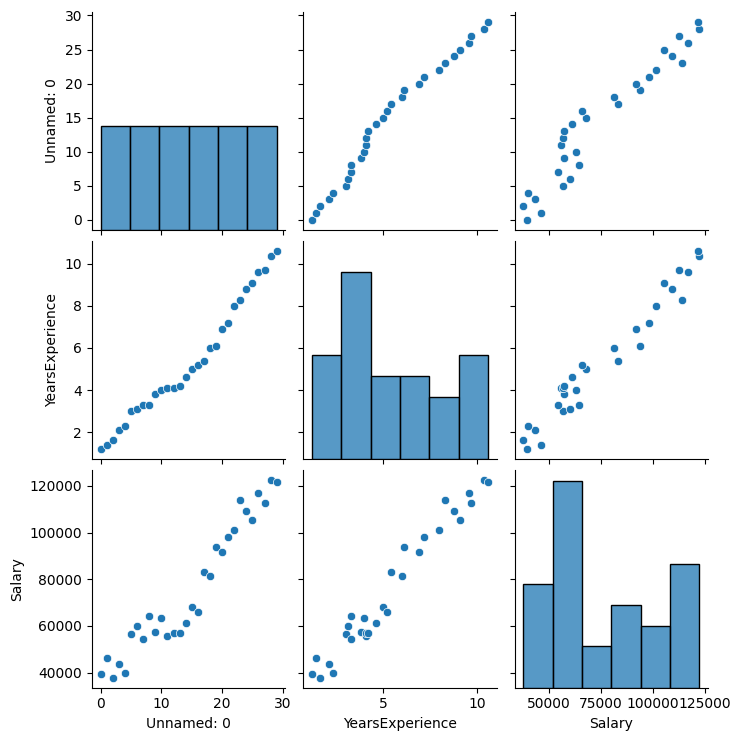

In [75]:
sns.pairplot(df)
plt.show()

**In the above plot, scatter diagrams are plotted for the numerical columns in the dataset: 'Unnamed: 0', 'YearsExperience', and 'Salary'. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the numerical columns in the data.**

## **Encoding Categorical Variables**

**As, Our dataset doesn't have any categorical variables we, don't need to perform Encoding of Categorical Variables.**

# **Independent and Dependent Variables**

In this project, I refer Independent variable as Feature variable and Dependent variable as Target variable. These variables are also recognized by different names as follows: -

## **Independent variable**

Independent variable is also called Input variable and is denoted by X. In practical applications, independent variable is also called Feature variable or Predictor variable. We can denote it as:-

Independent or Input variable (X) = Feature variable = Predictor variable

## **Dependent variable**

Dependent variable is also called Output variable and is denoted by y.

Dependent variable is also called Target variable or Response variable. It can be denoted it as follows:-

Dependent or Output variable (y) = Target variable = Response variable

Feature Variable (Independent Variable): YearsExperience
Target Variable (Dependent Variable): Salary

In [77]:
X = df['YearsExperience'].values
y = df['Salary'].values

# **Visual exploratory data analysis**

**visualize the relationship between X and y by plotting a scatterplot between X and y.**

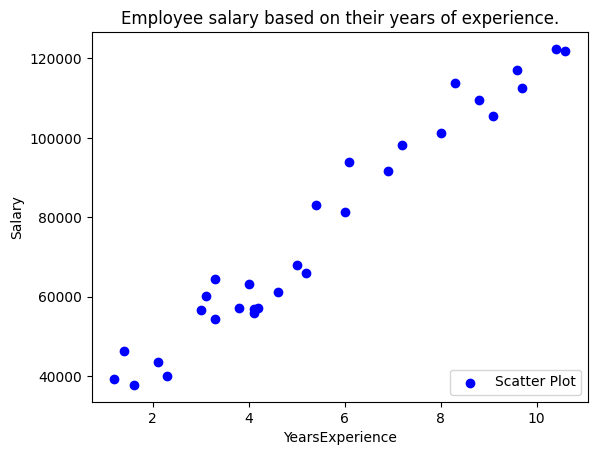

In [80]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Employee salary based on their years of experience.')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc=4)
plt.show()

## **Checking dimensions of X and y**

We need to check the dimensions of X and y to make sure they are in right format for Scikit-Learn API.

It is an important precursor to model building.

In [81]:
print(X.shape)
print(y.shape)

(30,)
(30,)


## **Reshaping X and y**

Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

It specifies first dimension to be -1, which means "unspecified".

Its value is inferred from the length of the array and the remaining dimensions

In [82]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [84]:
#Print the dimensions of X and y after reshaping
print(X.shape)
print(y.shape)

(30, 1)
(30, 1)


**We can see the difference in diminsions of X and y before and after reshaping.**

**It is essential in this case because getting the feature and target variable right is an important precursor to model building.**

## **Train test split**

**Split the dataset into two sets namely - train set and test set.**

**The model learn the relationships from the training data and predict on test data.**

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
# Print the dimensions of X_train,X_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(10, 1)
(10, 1)


## **Mechanics of the model**

After splitting the dataset into training and testing sets (`X_train`, `X_test`, `y_train`, and `y_test`), you can now instantiate a linear regression model and train it on the training data. The model will learn the relationship between 'YearsExperience' (from `X_train`) and 'Salary' (from `y_train`). Once trained, the model can be used to predict salaries based on the years of experience in the test set (`X_test`).

In [87]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


# Predict on the test data
y_pred=lm.predict(X_test)

## **Model slope and intercept term**

In [101]:
# Get the model slope and intercept
slope = lm.coef_[0][0]
intercept = lm.intercept_[0]

# Print the slope and intercept
print(f"Model slope: {slope}")
print(f"Model intercept: {intercept}")

Model slope: 9426.038769074838
Model intercept: 24382.731502336843


The model slope is given by `lm.coef_` and model intercept term is given by `lm.intercept_`.

The estimated model slope and intercept values are {:.6f} and {:.6f}.

So, the equation of the fitted regression line is

y = {:.6f} * x + {:.6f}

In [89]:
print(f"The estimated model slope and intercept values are {slope:.6f} and {intercept:.6f}. \n\nSo, the equation of the fitted regression line is \n\ny = {slope:.6f} * x + {intercept:.6f}")

The estimated model slope and intercept values are 9426.038769 and 24382.731502. 

So, the equation of the fitted regression line is 

y = 9426.038769 * x + 24382.731502


## **Making predictions**

After training the model, you can make predictions on new data using the `lm.predict()` method.

To predict Salary values for the first five observations in the test set (`X_test`), you can use:

In [90]:
lm.predict(X_test)

array([[115815.30756236],
       [ 71512.92534771],
       [102618.85328566],
       [ 75283.34085534],
       [ 55488.65944028],
       [ 60201.67882482],
       [122413.53470072],
       [107331.8726702 ],
       [ 63029.49045554],
       [ 35693.97802523]])

In [91]:
lm.predict([[6]])

array([[80938.96411679]])

In [94]:
# To make an individual prediction using the linear regression model.
# The input for predict needs to be in a 2D array format.
print(lm.predict([[24]]))

[[250607.66196013]]


# **Regression metrics for model performance**

Now, it is the time to evaluate model performance.

For regression problems, there are two ways to compute the model performance. They are RMSE (Root Mean Square Error) and R-Squared Value. These are explained below

## **RMSE**

RMSE is the standard deviation of the residuals. So, RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking square root of Mean Squared Error. RMSE is an absolute measure of fit. It gives us how spread the residuals are, given by the standard deviation of the residuals. The more concentrated the data is around the regression line (representing the relationship between YearsExperience and Salary), the lower the residuals and hence lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data.

In [95]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 5941.5401


## **R2 Score**

R2 Score is another metric to evaluate performance of a regression model. It is also called coefficient of determination. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model.

Mathematically,

R2 Score = Explained Variation/Total Variation

In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.

In [96]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.9553


# **Interpretation and Conclusion**

The calculated RMSE value is {:.4f}. This means that the standard deviation of the residuals is approximately {:.4f}. This value indicates the typical difference between the actual salary values and the values predicted by the model.

The calculated R2 Score value is {:.4f}. This indicates that approximately {:.2f}% of the variance in the Salary (dependent variable) is explained by the YearsExperience (independent variable) in this model. An R2 score closer to 1 generally indicates a better fit. You can consider this value in relation to typical benchmarks in your domain (e.g., 0.7 as mentioned previously) to assess if the model is a good fit for deployment.


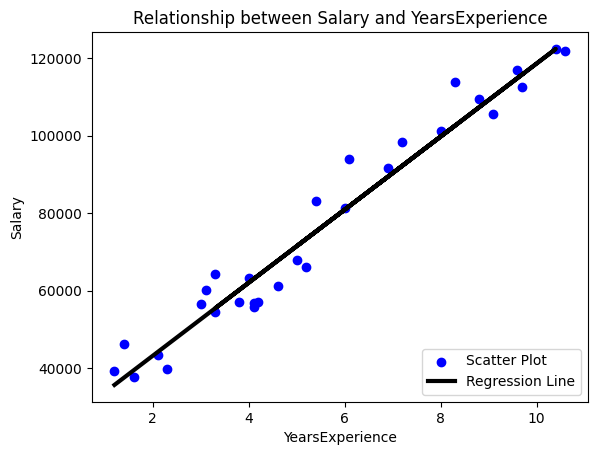

In [98]:
# Plot the Regression Line


plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Salary and YearsExperience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc=4)
plt.show()

# **Residual Analysis**

A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

The difference between the observed value of the dependent variable (Salary) and the predicted value (ŷi) is called the residual and is denoted by e. The scatter-plot of these residuals is called residual plot.

If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

Looking at the generated 'Residuals vs Predicted Values' plot, we can observe how the residuals are dispersed around the horizontal axis. Also, the histogram of residuals gives an idea of their distribution. You can examine these plots to assess if the linear regression model is appropriate for your data.

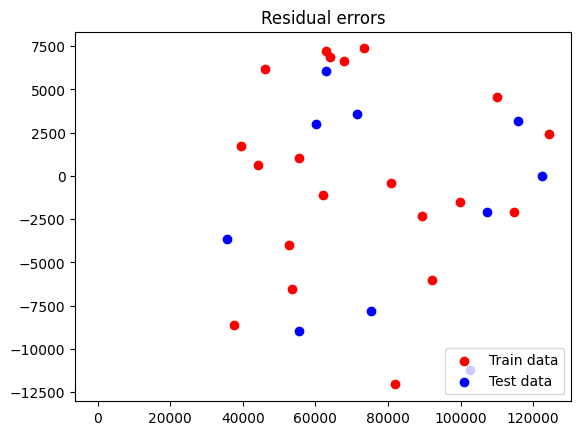

In [100]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

# **Checking for Overfitting and Underfitting**

I calculate training set score as 0.2861. Similarly, I calculate test set score as 0.5789. The training set score is very poor. So, the model does not learn the relationships appropriately from the training data. Thus, the model performs poorly on the training data. It is a clear sign of Underfitting. Hence, I validated my finding that the linear regression model does not provide good fit to the data.

Underfitting means our model performs poorly on the training data. It means the model does not capture the relationships between the training data. This problem can be improved by increasing model complexity. We should use more powerful models like Polynomial regression to increase model complexity.

In [102]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.9549
Test set score: 0.9553


In [104]:
# Save model for future use

import joblib
joblib.dump(lm, 'lm_regressor.pkl')

# To load the model
#lm2=joblib.load('lm_regressor.pkl')

['lm_regressor.pkl']